# Kaggle: Bike Sharing Demand
Task: https://www.kaggle.com/competitions/bike-sharing-demand/data  
Solution: https://www.kaggle.com/code/kwonyoung234/for-beginner

In [1]:
# Import libraries
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
from datetime import datetime

import os
print(os.listdir("./kaggle_bike_shring_demand/"))

['.ipynb_checkpoints', 'test.csv', 'train.csv', 'Untitled.ipynb']


### Data Import

In [2]:
train = pd.read_csv("./kaggle_bike_shring_demand/train.csv")
test = pd.read_csv("./kaggle_bike_shring_demand/test.csv")

In [3]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
"""
season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
temp - temperature in Celsius
atemp - "feels like" temperature in Celsius
"""

'\nseason -  1 = spring, 2 = summer, 3 = fall, 4 = winter \nweather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy \n2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist \n3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds \n4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog \ntemp - temperature in Celsius\natemp - "feels like" temperature in Celsius\n'

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [6]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


### Preprocessing

In [7]:
train.loc[0, 'datetime'].split()

['2011-01-01', '00:00:00']

In [8]:
train['tempDate'] = train.datetime.apply(lambda x: x.split())  
# train.tempDate로 column을 추가하면 info에서 조회 안됨! column으로 추가되는 것이 아니기 때문
train.tempDate

0        [2011-01-01, 00:00:00]
1        [2011-01-01, 01:00:00]
2        [2011-01-01, 02:00:00]
3        [2011-01-01, 03:00:00]
4        [2011-01-01, 04:00:00]
                  ...          
10881    [2012-12-19, 19:00:00]
10882    [2012-12-19, 20:00:00]
10883    [2012-12-19, 21:00:00]
10884    [2012-12-19, 22:00:00]
10885    [2012-12-19, 23:00:00]
Name: tempDate, Length: 10886, dtype: object

In [9]:
train['year'] = train.tempDate.apply(lambda x: x[0][:4])
train['month'] = train.tempDate.apply(lambda x: x[0][5:7])
train['day'] = train.tempDate.apply(lambda x: x[0][8:])

In [10]:
# Weekday
# 0: Monday ~ 6: Sunday
train['weekday'] = train.tempDate.apply(lambda x: datetime.strptime(x[0], "%Y-%m-%d").weekday())

train['hour'] = train.tempDate.apply(lambda x: x[1].split(":")[0])

In [11]:
train['year'] = pd.to_numeric(train.year, errors='coerce') # astype(int)로 하면 int32가 됨
train['month'] = pd.to_numeric(train.month, errors='coerce')
train['day'] = pd.to_numeric(train.day, errors='coerce')
train['hour'] = pd.to_numeric(train.hour, errors='coerce')

In [12]:
train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
 12  tempDate    10886 non-null  object 
 13  year        10886 non-null  int64  
 14  month       10886 non-null  int64  
 15  day         10886 non-null  int64  
 16  weekday     10886 non-null  int64  
 17  hour        10886 non-null  int64  
dtypes: float64(3), int64(13), object(2)
memory usage: 1.5+ MB


In [13]:
train = train.drop('tempDate', axis = 1)

In [14]:
# original dataset의 season labeling이 잘못되어 있다.
# 1, 2월이 spring으로 labeling되어 있다.

def season_data(month):
    if month in [1, 2, 12]:
        return 4
    elif month in [3, 4, 5]:
        return 1
    elif month in [6, 7, 8]:
        return 2
    else:
        return 3


train['season'] = train.month.apply(season_data)

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
 12  year        10886 non-null  int64  
 13  month       10886 non-null  int64  
 14  day         10886 non-null  int64  
 15  weekday     10886 non-null  int64  
 16  hour        10886 non-null  int64  
dtypes: float64(3), int64(13), object(1)
memory usage: 1.4+ MB


In [16]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,weekday,hour
0,2011-01-01 00:00:00,4,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,5,0
1,2011-01-01 01:00:00,4,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,5,1
2,2011-01-01 02:00:00,4,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,5,2
3,2011-01-01 03:00:00,4,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,5,3
4,2011-01-01 04:00:00,4,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,5,4


### EDA & Visualization

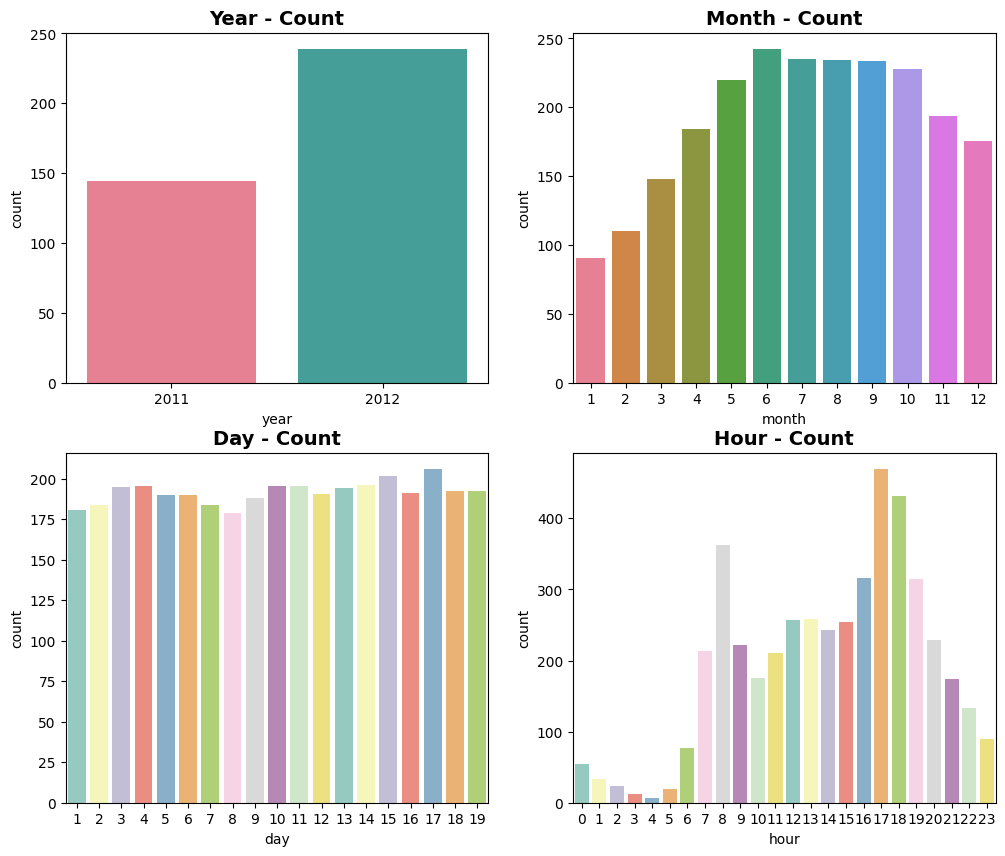

In [17]:
fig = plt.figure(figsize = (12, 10))

# Year - Count
ax1 = fig.add_subplot(2, 2, 1)
ax1 = sns.barplot(x = "year", y = "count",
                 data = train.groupby('year')['count'].mean().reset_index(),
                 palette = "husl")
ax1.set_title("Year - Count", 
              size=14, 
              weight = "bold")

# Month - Count
ax2 = fig.add_subplot(2, 2, 2)
ax2 = sns.barplot(x = "month", y = "count",
                 data = train.groupby('month')['count'].mean().reset_index(),
                 palette = "husl")
ax2.set_title("Month - Count", 
              size=14, 
              weight = "bold")

# Day - Count
ax3 = fig.add_subplot(2, 2, 3)
ax3 = sns.barplot(x = "day", y = "count",
                 data = train.groupby('day')['count'].mean().reset_index(),
                 palette = "Set3")
ax3.set_title("Day - Count", 
              size=14, 
              weight = "bold")

# Hour - Count
ax4 = fig.add_subplot(2, 2, 4)
ax4 = sns.barplot(x = "hour", y = "count",
                 data = train.groupby('hour')['count'].mean().reset_index(),
                 palette = "Set3")
ax4.set_title("Hour - Count", 
              size=14, 
              weight = "bold");

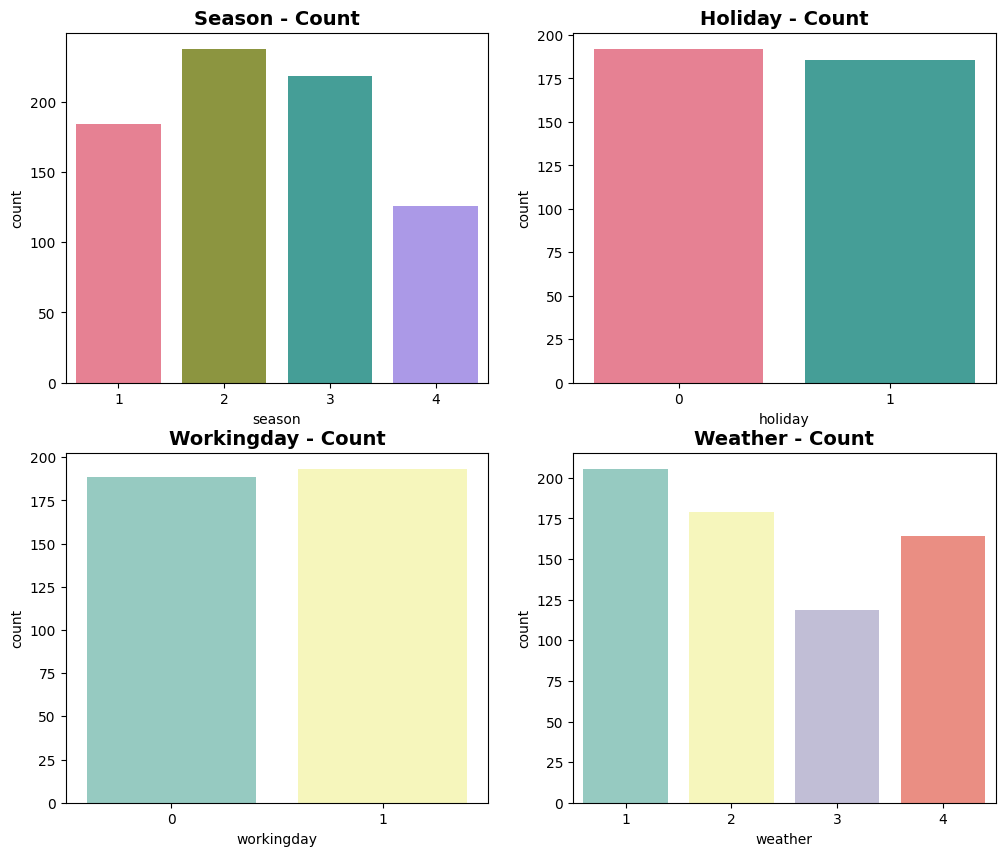

In [18]:
fig = plt.figure(figsize = (12, 10))

# Season - Count
ax1 = fig.add_subplot(2, 2, 1)
ax1 = sns.barplot(x = "season", y = "count",
                 data = train.groupby('season')['count'].mean().reset_index(),
                 palette = "husl")
ax1.set_title("Season - Count", 
              size=14, 
              weight = "bold")

# Holiday - Count
ax2 = fig.add_subplot(2, 2, 2)
ax2 = sns.barplot(x = "holiday", y = "count",
                 data = train.groupby('holiday')['count'].mean().reset_index(),
                 palette = "husl")
ax2.set_title("Holiday - Count", 
              size=14, 
              weight = "bold")

# Workingday - Count
ax3 = fig.add_subplot(2, 2, 3)
ax3 = sns.barplot(x = "workingday", y = "count",
                 data = train.groupby('workingday')['count'].mean().reset_index(),
                 palette = "Set3")
ax3.set_title("Workingday - Count", 
              size=14, 
              weight = "bold")

# Weather - Count
ax4 = fig.add_subplot(2, 2, 4)
ax4 = sns.barplot(x = "weather", y = "count",
                 data = train.groupby('weather')['count'].mean().reset_index(),
                 palette = "Set3")
ax4.set_title("Weather - Count", 
              size=14, 
              weight = "bold");

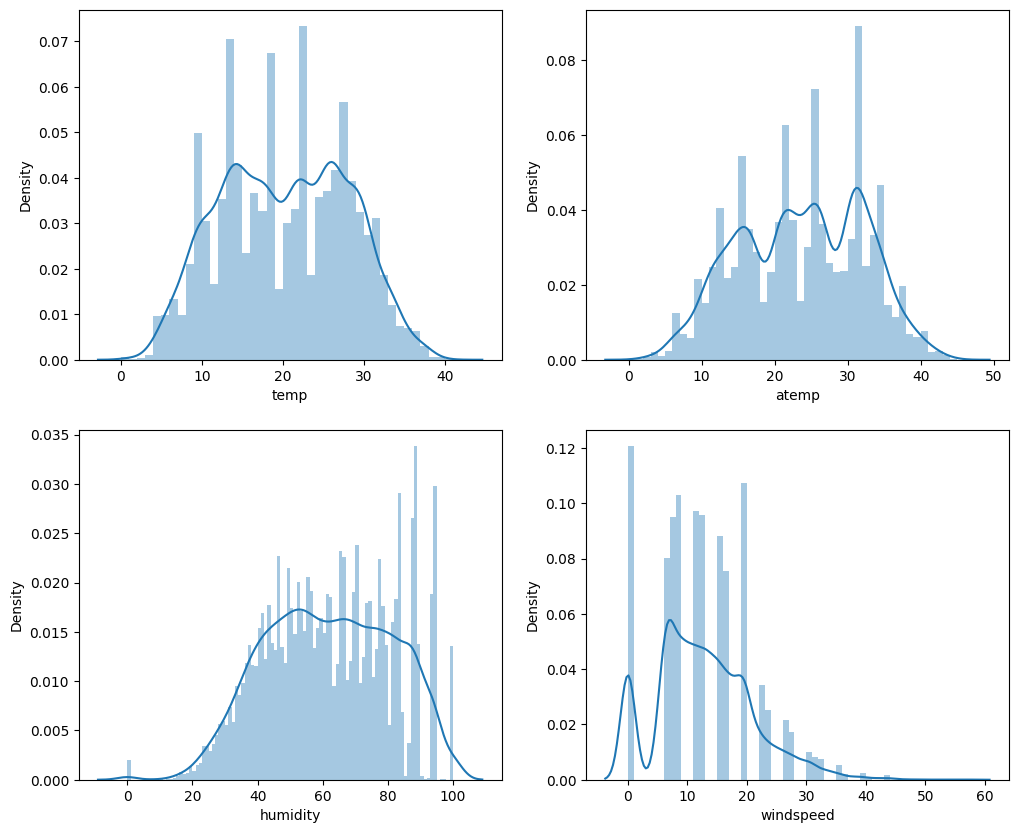

In [19]:
fig = plt.figure(figsize = (12, 10))

# Temperature - Count
ax1 = fig.add_subplot(2, 2, 1)
ax1 = sns.distplot(train.temp,
                   bins = range(train.temp.min().astype(int),
                               train.temp.max().astype(int) + 1))

# Avg. temperature - Count
ax2 = fig.add_subplot(2, 2, 2)
ax2 = sns.distplot(train.atemp,
                 bins = range(train.atemp.min().astype(int),
                             train.atemp.max().astype(int) + 1));

# Humidity - Count
ax3 = fig.add_subplot(2, 2, 3)
ax3 = sns.distplot(train.humidity,
                  bins = range(train.humidity.min().astype(int),
                              train.humidity.max().astype(int) + 1))

# Wind speed - Count
ax4 = fig.add_subplot(2, 2, 4)
ax4 = sns.distplot(train.windspeed,
                  bins = range(train.windspeed.min().astype(int),
                              train.windspeed.max().astype(int) + 1))

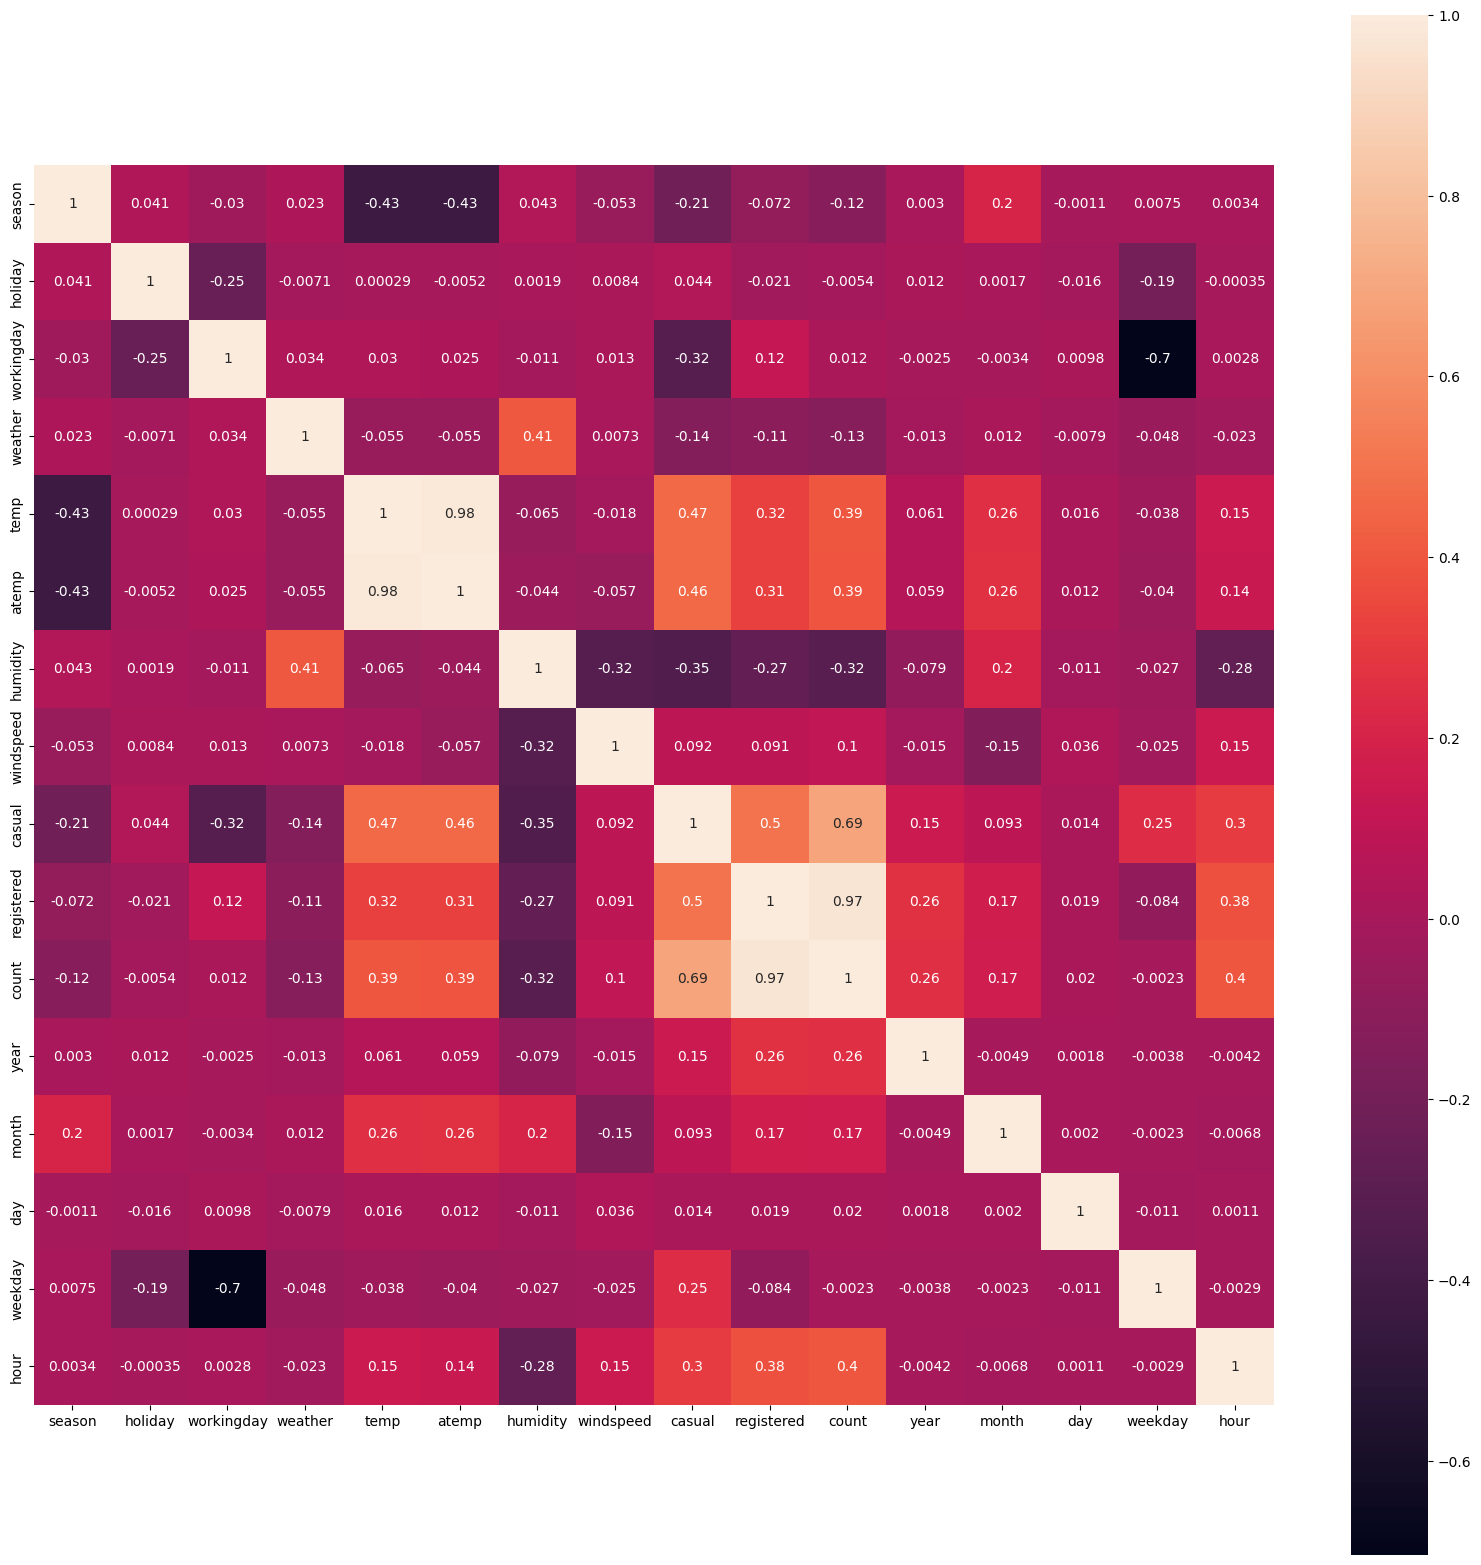

In [21]:
# Correlations between each variable
fig = plt.figure(figsize = (20, 20))
ax = sns.heatmap(train.loc[:, ~train.columns.isin(['datetime'])].corr(), 
                 annot = True,
                square = True)

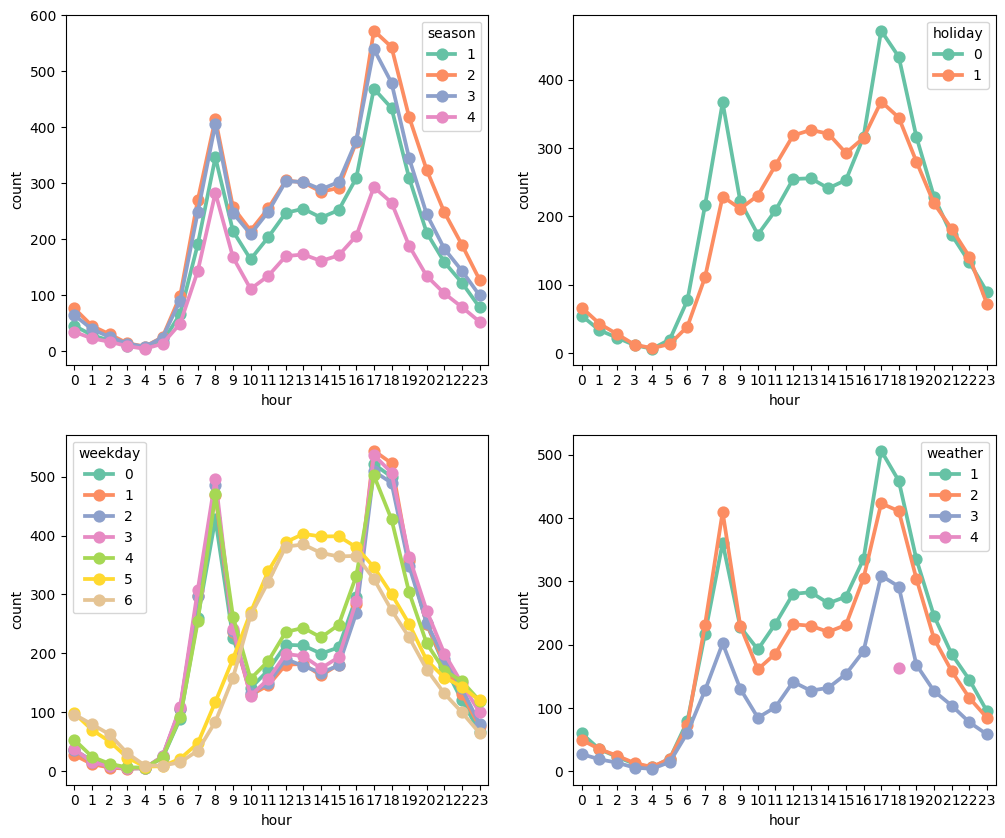

In [23]:
fig = plt.figure(figsize = (12, 10))

# Hour & Season - Count
ax1 = fig.add_subplot(2, 2, 1)
ax1 = sns.pointplot(x = 'hour',
                   y = 'count',
                   hue = 'season',
                   data = train.groupby(['season', 'hour'])['count'].mean().reset_index(),
                   palette = "Set2")

# Hour & Holiday - Count
ax2 = fig.add_subplot(2, 2, 2)
ax2 = sns.pointplot(x = 'hour',
                   y = 'count',
                   hue = 'holiday',
                   data = train.groupby(['holiday', 'hour'])['count'].mean().reset_index(),
                   palette = "Set2")

# Hour & Weekday - Count
ax3 = fig.add_subplot(2, 2, 3)
ax3 = sns.pointplot(x = "hour",
                   y = "count",
                   hue = "weekday",
                   data = train.groupby(['weekday', 'hour'])['count'].mean().reset_index(),
                   palette = "Set2")

# Hour & Weather - Count
ax4 = fig.add_subplot(2, 2, 4)
ax4 = sns.pointplot(x = 'hour',
                   y = 'count',
                   hue = 'weather',
                   data = train.groupby(['weather', 'hour'])['count'].mean().reset_index(),
                   palette = "Set2")

In [24]:
train[train.weather == 4]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,weekday,hour
5631,2012-01-09 18:00:00,4,0,1,4,8.2,11.365,86,6.0032,6,158,164,2012,1,9,0,18


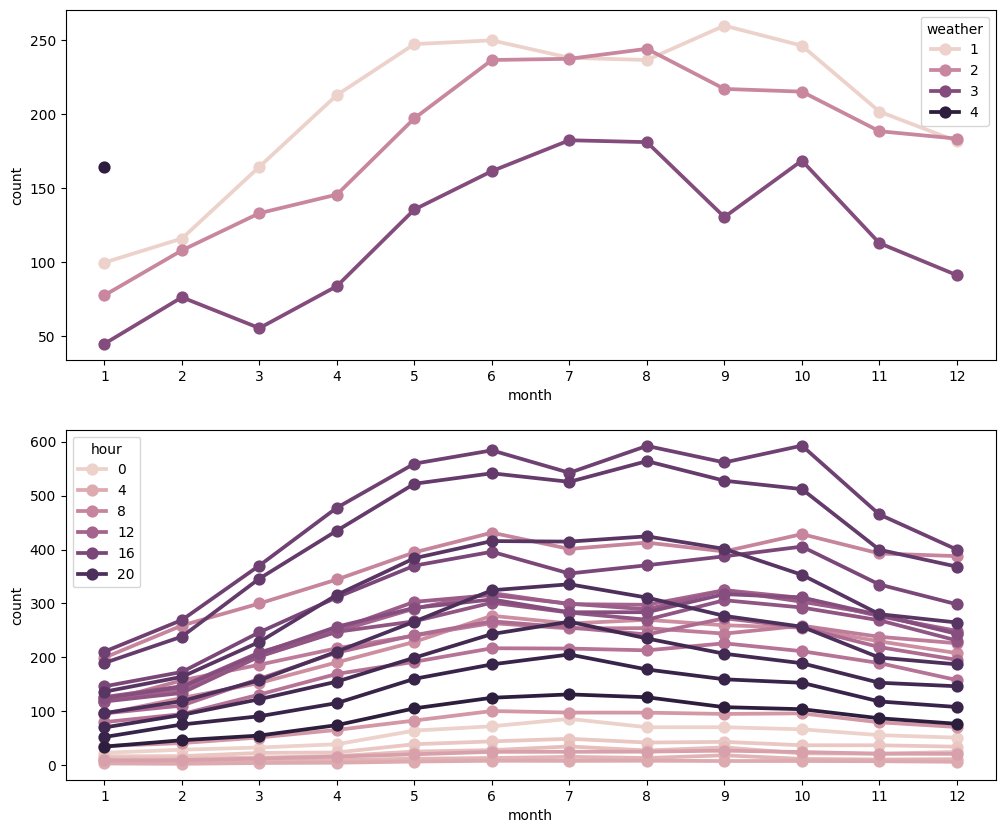

In [25]:
fig = plt.figure(figsize = (12, 10))

# Month & Weather - Count
ax1 = fig.add_subplot(2, 1, 1)
ax1 = sns.pointplot(x = 'month',
                   y = 'count', 
                   hue = 'weather',
                   data = train.groupby(['weather', 'month'])['count'].mean().reset_index())

# Month & 
ax2 = fig.add_subplot(2, 1, 2)
ax2 = sns.pointplot(x = "month",
                   y = "count",
                   hue = "hour",
                   data = train.groupby(['hour', 'month'])['count'].mean().reset_index())

### RF for Windspeed

In [27]:
train['weekday'] = train.weekday.astype('category')

In [28]:
# 0: Monday --> # 6: Sunday
train['weekday'].cat.categories

Index([0, 1, 2, 3, 4, 5, 6], dtype='int64')

In [29]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
# Target : windspeed that is not 0
# Train : Other columns
# Test : windspeed that is 0

In [31]:
windspeed_0 = train[train.windspeed == 0]
windspeed_no0 = train[train.windspeed != 0]

In [34]:
len(windspeed_0) / len(windspeed_no0) * 100

13.715658623211112

In [35]:
ws_0_df = windspeed_0.drop(['datetime', 'windspeed', 'casual', 'registered', 'count', 'holiday', 'workingday'], axis = 1)
ws_no0_df = windspeed_no0.drop(['datetime', 'windspeed', 'casual', 'registered', 'count', 'holiday', 'workingday'], axis = 1)

In [39]:
ws_no0_series = windspeed_no0['windspeed']
ws_no0_series

5         6.0032
10       16.9979
11       19.0012
12       19.0012
13       19.9995
          ...   
10881    26.0027
10882    15.0013
10883    15.0013
10884     6.0032
10885     8.9981
Name: windspeed, Length: 9573, dtype: float64

In [40]:
rf = RandomForestRegressor()
rf.fit(ws_no0_df, ws_no0_series)

RandomForestRegressor()

In [41]:
predicted_ws_0 = rf.predict(ws_0_df)

In [42]:
predicted_ws_0

array([ 7.472242,  7.522157,  7.452209, ...,  9.800693, 11.209703,
       13.681065])

In [43]:
windspeed_0['windspeed'] = predicted_ws_0
windspeed_0.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,weekday,hour
0,2011-01-01 00:00:00,4,0,0,1,9.84,14.395,81,7.472242,3,13,16,2011,1,1,5,0
1,2011-01-01 01:00:00,4,0,0,1,9.02,13.635,80,7.522157,8,32,40,2011,1,1,5,1
2,2011-01-01 02:00:00,4,0,0,1,9.02,13.635,80,7.452209,5,27,32,2011,1,1,5,2
3,2011-01-01 03:00:00,4,0,0,1,9.84,14.395,75,7.782519,3,10,13,2011,1,1,5,3
4,2011-01-01 04:00:00,4,0,0,1,9.84,14.395,75,7.692538,0,1,1,2011,1,1,5,4


In [45]:
train_ws = pd.concat([windspeed_0, windspeed_no0], axis = 0)
train_ws.datetime = pd.to_datetime(train_ws.datetime, errors = 'coerce')
train_ws = train_ws.sort_values(by = ['datetime'])

In [46]:
train_ws.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,weekday,hour
0,2011-01-01 00:00:00,4,0,0,1,9.84,14.395,81,7.472242,3,13,16,2011,1,1,5,0
1,2011-01-01 01:00:00,4,0,0,1,9.02,13.635,80,7.522157,8,32,40,2011,1,1,5,1
2,2011-01-01 02:00:00,4,0,0,1,9.02,13.635,80,7.452209,5,27,32,2011,1,1,5,2
3,2011-01-01 03:00:00,4,0,0,1,9.84,14.395,75,7.782519,3,10,13,2011,1,1,5,3
4,2011-01-01 04:00:00,4,0,0,1,9.84,14.395,75,7.692538,0,1,1,2011,1,1,5,4


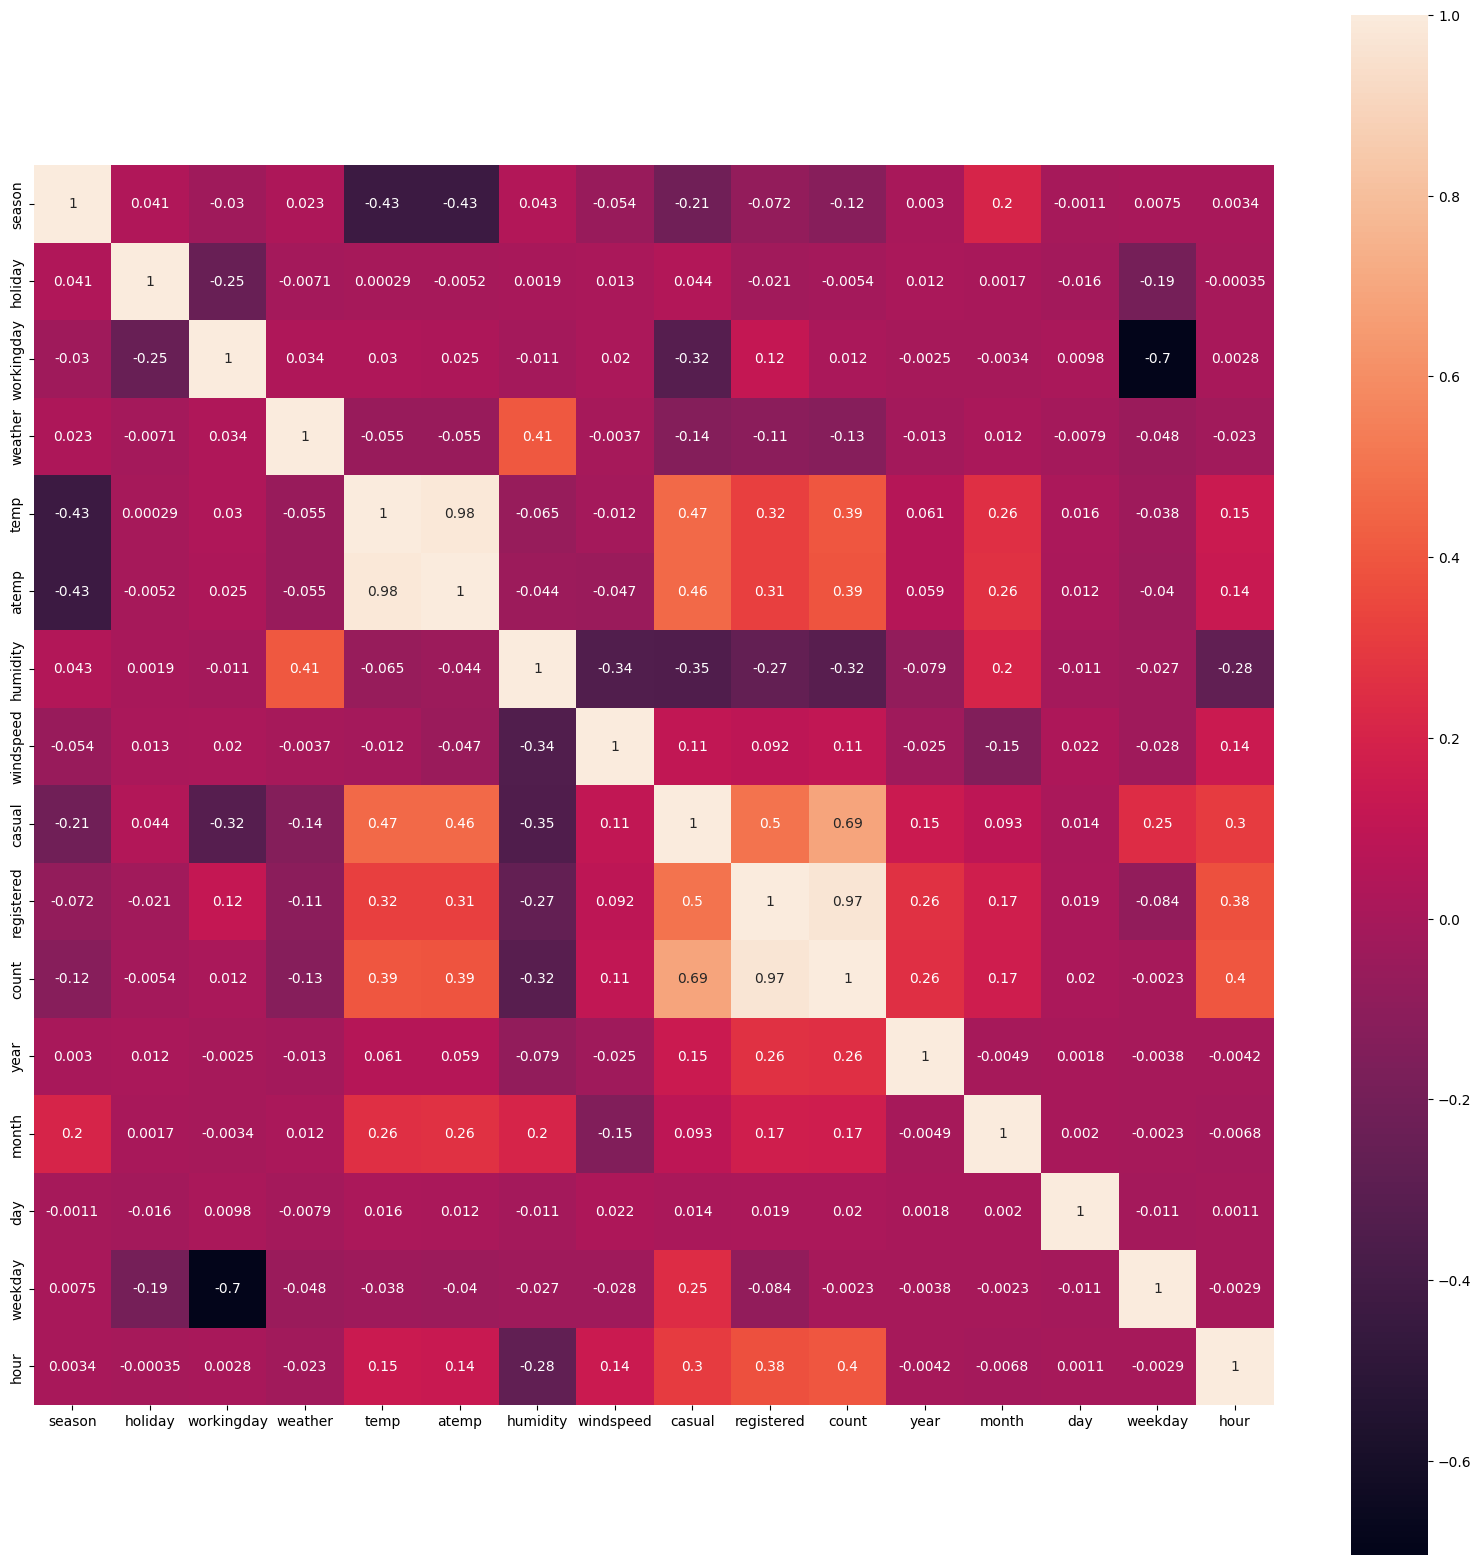

In [47]:
# Correlations between each variable
fig = plt.figure(figsize = (20, 20))
ax = sns.heatmap(train_ws.loc[:, ~train.columns.isin(['datetime'])].corr(), 
                 annot = True,
                 square = True)

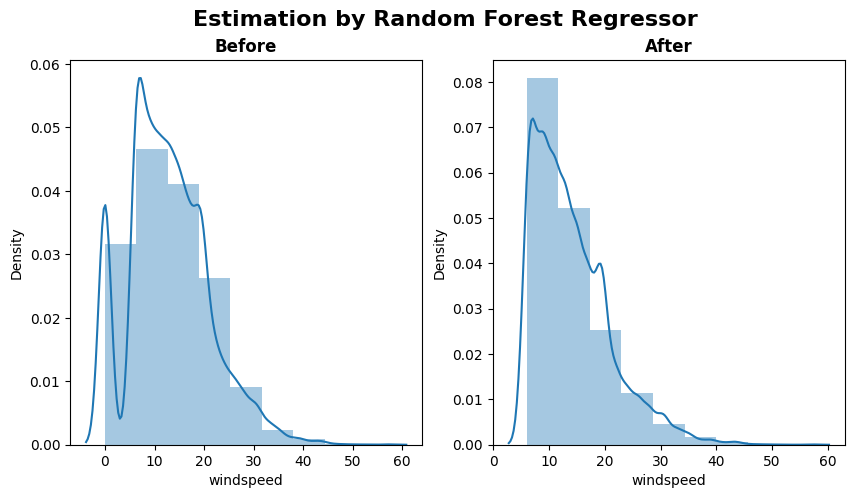

In [61]:
fig = plt.figure(figsize = (10, 5))
plt.suptitle("Estimation by Random Forest Regressor",
            fontsize = 16, weight = "bold")

ax1 = fig.add_subplot(1, 2, 1)
ax1 = sns.distplot(train['windspeed'],
                  bins = np.linspace(train.windspeed.min(), train.windspeed.max(), 10))
ax1.set_title("Before", weight = 'bold')

ax2 = fig.add_subplot(1, 2, 2)
ax2 = sns.distplot(train_ws['windspeed'],
                   bins = np.linspace(train_ws.windspeed.min(), train_ws.windspeed.max(), 10))
ax2.set_title("After", weight = 'bold')

plt.show()

### Total Dataset

In [66]:
tr = pd.read_csv('./kaggle_bike_shring_demand/train.csv')
te = pd.read_csv('./kaggle_bike_shring_demand/test.csv')
combine = pd.concat([tr, te], axis = 0)

combine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17379 entries, 0 to 6492
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    17379 non-null  object 
 1   season      17379 non-null  int64  
 2   holiday     17379 non-null  int64  
 3   workingday  17379 non-null  int64  
 4   weather     17379 non-null  int64  
 5   temp        17379 non-null  float64
 6   atemp       17379 non-null  float64
 7   humidity    17379 non-null  int64  
 8   windspeed   17379 non-null  float64
 9   casual      10886 non-null  float64
 10  registered  10886 non-null  float64
 11  count       10886 non-null  float64
dtypes: float64(6), int64(5), object(1)
memory usage: 1.7+ MB


In [67]:
combine['tempDate'] = combine.datetime.apply(lambda x: x.split())
combine['weekday'] = combine.tempDate.apply(lambda x: datetime.strptime(x[0], "%Y-%m-%d").weekday())
combine['year'] = combine.tempDate.apply(lambda x: x[0].split('-')[0])
combine['month'] = combine.tempDate.apply(lambda x: x[0].split('-')[1])
combine['day'] = combine.tempDate.apply(lambda x: x[0].split('-')[2])
combine['hour'] = combine.tempDate.apply(lambda x: x[1].split(':')[0])

combine['year'] = pd.to_numeric(combine.year, errors='coerce')
combine['month'] = pd.to_numeric(combine.month, errors='coerce')
combine['day'] = pd.to_numeric(combine.day, errors='coerce')
combine['hour'] = pd.to_numeric(combine.hour, errors='coerce')

combine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17379 entries, 0 to 6492
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    17379 non-null  object 
 1   season      17379 non-null  int64  
 2   holiday     17379 non-null  int64  
 3   workingday  17379 non-null  int64  
 4   weather     17379 non-null  int64  
 5   temp        17379 non-null  float64
 6   atemp       17379 non-null  float64
 7   humidity    17379 non-null  int64  
 8   windspeed   17379 non-null  float64
 9   casual      10886 non-null  float64
 10  registered  10886 non-null  float64
 11  count       10886 non-null  float64
 12  tempDate    17379 non-null  object 
 13  weekday     17379 non-null  int64  
 14  year        17379 non-null  int64  
 15  month       17379 non-null  int64  
 16  day         17379 non-null  int64  
 17  hour        17379 non-null  int64  
dtypes: float64(6), int64(10), object(2)
memory usage: 2.5+ MB


In [68]:
combine['season'] = combine.month.apply(season_data)
combine.weekday = combine.weekday.astype('category')

combine = combine.drop(columns=['tempDate'], axis = 1)
combine.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,weekday,year,month,day,hour
0,2011-01-01 00:00:00,4,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0,5,2011,1,1,0
1,2011-01-01 01:00:00,4,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0,5,2011,1,1,1
2,2011-01-01 02:00:00,4,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0,5,2011,1,1,2
3,2011-01-01 03:00:00,4,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0,5,2011,1,1,3
4,2011-01-01 04:00:00,4,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0,5,2011,1,1,4


In [69]:
data_wind_0 = combine[combine['windspeed'] == 0]
data_wind_not_0 = combine[combine['windspeed'] != 0]

data_wind_0.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'weekday', 'year', 'month', 'day', 'hour'],
      dtype='object')

In [70]:
wind_0_df = data_wind_0.drop(columns=['windspeed', 'casual', 'holiday', 'datetime', 'workingday', 'registered', 'count'], axis = 1)
wind_not_0_df = data_wind_not_0.drop(columns=['windspeed', 'casual', 'holiday', 'datetime', 'workingday', 'registered', 'count'], axis = 1)
wind_not_0_series = data_wind_not_0['windspeed']

In [71]:
wind_0_df.head()

,season,weather,temp,atemp,humidity,weekday,year,month,day,hour
0,4,1,9.84,14.395,81,5,2011,1,1,0
1,4,1,9.02,13.635,80,5,2011,1,1,1
2,4,1,9.02,13.635,80,5,2011,1,1,2
3,4,1,9.84,14.395,75,5,2011,1,1,3
4,4,1,9.84,14.395,75,5,2011,1,1,4


In [72]:
wind_not_0_df.head()

,season,weather,temp,atemp,humidity,weekday,year,month,day,hour
5,4,2,9.84,12.880,75,5,2011,1,1,5
10,4,1,15.58,19.695,76,5,2011,1,1,10
11,4,1,14.76,16.665,81,5,2011,1,1,11
12,4,1,17.22,21.210,77,5,2011,1,1,12
13,4,2,18.86,22.725,72,5,2011,1,1,13


In [73]:
rf2 = RandomForestRegressor()
rf2.fit(wind_not_0_df, wind_not_0_series)

RandomForestRegressor()

In [74]:
predicted = rf2.predict(wind_0_df)
print(predicted)

[ 7.092553  6.782678  6.622749 ...  8.361935 25.050295 11.140492]


In [75]:
data_wind_0['windspeed'] = predicted

combine = pd.concat([data_wind_0, data_wind_not_0], axis = 0)
combine.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,weekday,year,month,day,hour
0,2011-01-01 00:00:00,4,0,0,1,9.84,14.395,81,7.092553,3.0,13.0,16.0,5,2011,1,1,0
1,2011-01-01 01:00:00,4,0,0,1,9.02,13.635,80,6.782678,8.0,32.0,40.0,5,2011,1,1,1
2,2011-01-01 02:00:00,4,0,0,1,9.02,13.635,80,6.622749,5.0,27.0,32.0,5,2011,1,1,2
3,2011-01-01 03:00:00,4,0,0,1,9.84,14.395,75,6.442787,3.0,10.0,13.0,5,2011,1,1,3
4,2011-01-01 04:00:00,4,0,0,1,9.84,14.395,75,6.212910,0.0,1.0,1.0,5,2011,1,1,4


In [77]:
categorical_cols = ['season', 'holiday', 'workingday', 'weekday', 'year', 'month', 'day', 'hour']
for col in categorical_cols:
    combine[col] = combine[col].astype('category')

In [79]:
tr_df = combine[pd.notnull(combine['count'])].sort_values(by = 'datetime')
te_df = combine[~pd.notnull(combine['count'])].sort_values(by = 'datetime')

datetime_col = te_df['datetime']
y_labels = tr_df['count']
y_labels_reg = tr_df['registered'] # Registered user
y_labels_cas = tr_df['casual'] # Temporal user

In [80]:
drop_cols = ['datetime', 'casual', 'registered', 'count']

tr_df = tr_df.drop(drop_cols, axis = 1)
te_df = te_df.drop(drop_cols, axis = 1)

In [82]:
# RMSLE
# Penalise underestimated features instead of overestimated features.
# 오차를 제곱하여 평균한 값의 제곱근으로, 값이 작을수록 높은 정밀도를 의미한다.

def rmsle(y, y_, convertExp = True):
    if convertExp:
        y = np.exp(y)
        y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y])) # Replace NaN with zero and infinity with large finite numbers.
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    return np.sqrt(np.mean((log1 - log2) ** 2))

In [83]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [84]:
lr = LinearRegression()

y_labels_log = np.log1p(y_labels) # log1p = log(1+x) 음의 무한대로의 발산 방지
lr.fit(tr_df, y_labels_log)

LinearRegression()

In [85]:
preds = lr.predict(tr_df)
print("RMSLE value for Linear Regression: {}".format(rmsle(np.exp(y_labels_log), np.exp(preds), False)))

RMSLE value for Linear Regression: 0.9776381482960536


# of count in the original dataset: 10886


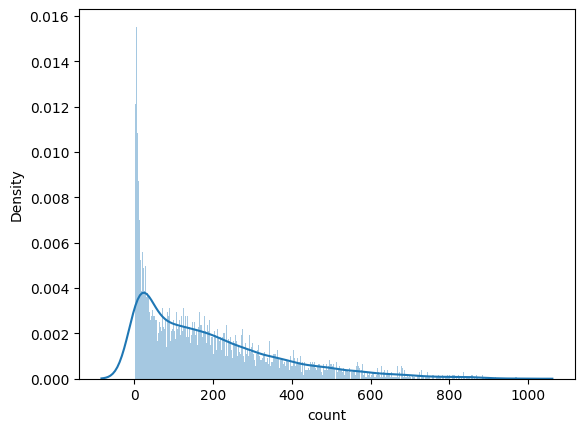

In [98]:
# min count: 1 ~ max count: 97 > 데이터 간격이 커 log를 취하지 않으면 결과값이 발산할 수 있음
sns.distplot(y_labels,
            bins = range(y_labels.min().astype('int'),
                        y_labels.max().astype('int')));

print("# of count in the original dataset:", y_labels.count())

In [100]:
# 3 sigma를 활용한 이상치 확인
# https://ko.wikipedia.org/wiki/68-95-99.7_%EA%B7%9C%EC%B9%99

y_labels[np.logical_and(y_labels.mean() - 3*y_labels.std() <= y_labels, y_labels.mean() + 3 * y_labels.std() >= y_labels)].count()

10739

In [101]:
# GridSearch Cross-validation
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [102]:
ridge = Ridge()

ridge_params = {'max_iter': [3000],
               'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)
grid_ridge = GridSearchCV(ridge,
                         ridge_params,
                         scoring = rmsle_scorer,
                         cv = 5)

In [103]:
grid_ridge.fit(tr_df, y_labels_log)

grid_preds = grid_ridge.predict(tr_df)
print(grid_ridge.best_params_)
print("RMSLE value for Ridge Regression {}".format(rmsle(np.exp(y_labels_log), np.exp(grid_preds), False)))

{'alpha': 0.001, 'max_iter': 3000}
RMSLE value for Ridge Regression 0.9776381481238203


In [104]:
df = pd.DataFrame(grid_ridge.cv_results_)

In [105]:
df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.012402,0.006279,0.014796,0.004119,0.001,3000,"{'alpha': 0.001, 'max_iter': 3000}",-1.001278,-0.903791,-1.044922,-1.005422,-0.980481,-0.987179,0.046614,1
1,0.009203,0.001164,0.012198,0.001600,0.01,3000,"{'alpha': 0.01, 'max_iter': 3000}",-1.001278,-0.903791,-1.044922,-1.005422,-0.980481,-0.987179,0.046614,2
2,0.013001,0.008922,0.034995,0.031142,0.1,3000,"{'alpha': 0.1, 'max_iter': 3000}",-1.001280,-0.903791,-1.044923,-1.005422,-0.980481,-0.987179,0.046614,3
3,0.008006,0.000895,0.010193,0.001943,1,3000,"{'alpha': 1, 'max_iter': 3000}",-1.001296,-0.903789,-1.044939,-1.005417,-0.980484,-0.987185,0.046619,4
4,0.007803,0.001469,0.012201,0.001723,10,3000,"{'alpha': 10, 'max_iter': 3000}",-1.001455,-0.903772,-1.045098,-1.005370,-0.980515,-0.987242,0.046670,5


In [107]:
lasso = Lasso()

lasso_params = {'max_iter': [3000],
               'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_lasso = GridSearchCV(lasso, 
                          lasso_params, 
                          scoring = rmsle_scorer, 
                          cv = 5)
grid_lasso.fit(tr_df, y_labels_log)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'max_iter': [3000]},
             scoring=make_scorer(rmsle, greater_is_better=False, response_method='predict'))

In [108]:
lasso_preds = grid_lasso.predict(tr_df)

print("RMSLE value for Lasso Regression {}".format(rmsle(np.exp(y_labels_log), np.exp(lasso_preds), False)))

RMSLE value for Lasso Regression 0.9778802735644979


In [109]:
rf = RandomForestRegressor()

rf_params = {'n_estimators': [1, 10, 100]}
grid_rf = GridSearchCV(rf, 
                       rf_params,
                       scoring = rmsle_scorer,
                       cv = 5)
grid_rf.fit(tr_df, y_labels_log)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [1, 10, 100]},
             scoring=make_scorer(rmsle, greater_is_better=False, response_method='predict'))

In [110]:
rf_preds = grid_rf.predict(tr_df)
print("RMSLE value for Random Forest {}".format(rmsle(np.exp(y_labels_log), np.exp(rf_preds), False)))

RMSLE value for Random Forest 0.10202416338257496


In [111]:
# Gradient Boost
from sklearn.ensemble import GradientBoostingRegressor

In [115]:
gb = GradientBoostingRegressor()

gb_params = {'max_depth': range(1, 11, 1),
            'n_estimators': [1, 10, 100]}
grid_gb = GridSearchCV(gb, gb_params,
                      scoring = rmsle_scorer,
                      cv = 5)
grid_gb.fit(tr_df, y_labels_log)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': range(1, 11),
                         'n_estimators': [1, 10, 100]},
             scoring=make_scorer(rmsle, greater_is_better=False, response_method='predict'))

In [117]:
gb_preds = grid_db.predict(tr_df)
print("RMSLE value for Gradient Boosting {}".format(rmsle(np.exp(y_labels_log), np.exp(gb_preds), False)))

RMSLE value for Gradient Boosting 0.2062057605378281


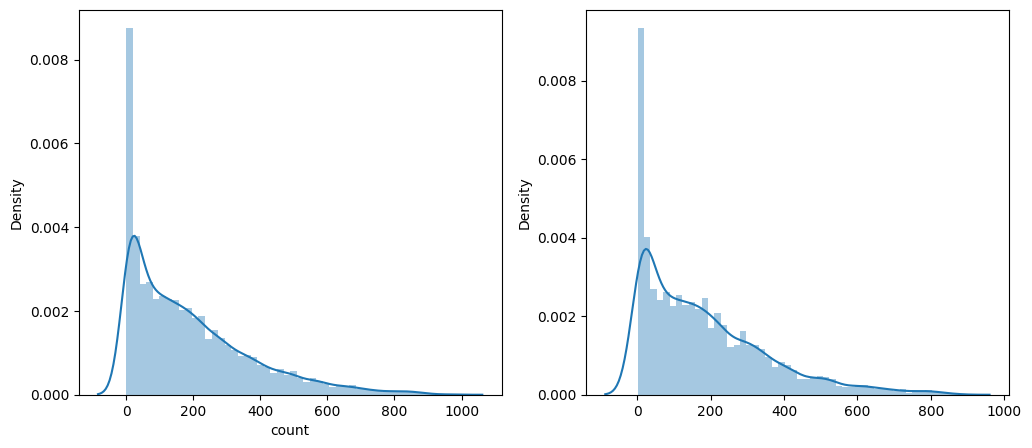

In [119]:
pred_test = grid_gb.predict(te_df)

fig, (ax1, ax2) = plt.subplots(ncols = 2)
fig.set_size_inches(12, 5)
sns.distplot(y_labels, ax = ax1, bins = 50)
sns.distplot(np.exp(pred_test), ax = ax2, bins = 50)
plt.show()

In [125]:
submission = pd.DataFrame({
                            'datetime': datetime_col,
                            'count': [round(max(0, x)) for x in np.exp(pred_test)]
                          })

In [126]:
submission.head()

,datetime,count
0,2011-01-20 00:00:00,13
1,2011-01-20 01:00:00,6
2,2011-01-20 02:00:00,4
3,2011-01-20 03:00:00,3
4,2011-01-20 04:00:00,3
